<a href="https://colab.research.google.com/github/umesharma15/GTA---Capston-1/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# *Terrorism is an illegal act, which aims to create fear among ordinary people. Terrorism is not just a word; This is the most important threat to humanity. If a person or group spreads violence, riots, burglaries, rapes, kidnappings, fighting, bombings, all of this is terrorism. For the first time in India, terrorism was considered naxalite. For the first time in 1967, some inhabitants of the Bengal region were furious; they came out as Naxalites to make their point of view.*

We have some Data of the terrorism across the world. I am going to analyze this data. 

Let’s start by importing some required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Both matplotlib and seaborn are very popular libraries that are used for visualizations. 
#Import warnings and set it to ignore to just ignore all the warnings.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Global Terrorism Data (1).csv'

In [ ]:
#Now import the dataset using read_csv.
terrorism_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Global Terrorism Data (1).csv', encoding = "ISO-8859-1", engine='python')

In [ ]:
print("There are {} rows and {} columns in the dataset".format(terrorism_df.shape[0],terrorism_df.shape[1]))

There are 181691 rows and 135 columns in the dataset


In [ ]:
#View the total number of unique columns in the dataset.
No_of_cols=terrorism_df.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)

There are total 135 columns in the data


In [ ]:
#let's rename some important columns
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [ ]:
#Columns names were updated in this data frame
terrorism_df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
#Taking only those columns which are required for analysis in the dataset.
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [ ]:
#our new dataframe
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


**Making some changes that are required for the dataset.**

In [ ]:
#Fill NaN values in Target_subtype column as Others
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')

In [ ]:
#Fill NaN values in the State column as Unknown
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [ ]:
#Fill NaN values in the city column as Unknown
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')

In [ ]:
#To make it simpler replace it with Vehicle
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

In [ ]:
#Our final updated data frame.
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [ ]:
terrorism_df.shape

(181691, 12)

In [ ]:
#Check for null values.
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

There are no null values over the entire data.

In [ ]:
terrorism_df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [ ]:
#View unique column names.
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [ ]:
#Number of columns in the dataset.
terrorism_df.columns.nunique()

12

In [ ]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 205 countries were noted in the data


In [ ]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [ ]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [ ]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [ ]:
print(terrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [ ]:
print(terrorism_df['Gang_name'].nunique())

3537


**There was a total of 3537 gangs in this dataset.**

In [ ]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [ ]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            181691 non-null  int64 
 1   Month           181691 non-null  int64 
 2   Day             181691 non-null  int64 
 3   Country         181691 non-null  object
 4   Region          181691 non-null  object
 5   State           181691 non-null  object
 6   City            181691 non-null  object
 7   Attack_type     181691 non-null  object
 8   Target_type     181691 non-null  object
 9   Target_subtype  181691 non-null  object
 10  Gang_name       181691 non-null  object
 11  Weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


In [ ]:
#View the statistical description of the dataset.
terrorism_df.describe()

,Year,Month,Day
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644
std,13.259430,3.388303,8.814045
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


In [ ]:
#Top 10 affected countries.
terrorism_df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [ ]:
#Top 10 affected regions.
terrorism_df['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

In [ ]:
#Top 10 affected States.
terrorism_df['State'].value_counts().head(10)

Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

In [ ]:
terrorism_df['Target_subtype'].value_counts().head(10)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
others                                                     10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: Target_subtype, dtype: int64

In [ ]:
#Top 10 affected cities.
terrorism_df['City'].value_counts().head(10)

Unknown         10209
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
Belfast          2171
Santiago         1621
Mogadishu        1581
San Salvador     1558
Istanbul         1048
Name: City, dtype: int64

In [ ]:
#Top 10 chosen attacking modes.
terrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

In [ ]:
#Top 10 targets to attack.
terrorism_df['Target_type'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_type, dtype: int64

In [ ]:
#most dangerous and leading top 10 gangs.
terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gang_name, dtype: int64

In [ ]:
#Most chosen weapons for attacks.
terrorism_df['Weapon_type'].value_counts().head(5)

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: Weapon_type, dtype: int64

# *Visualizations*

Now let us find some hot zones using visualizations. For this, we have to use matplotlib and seaborn which we have installed at the beginning.


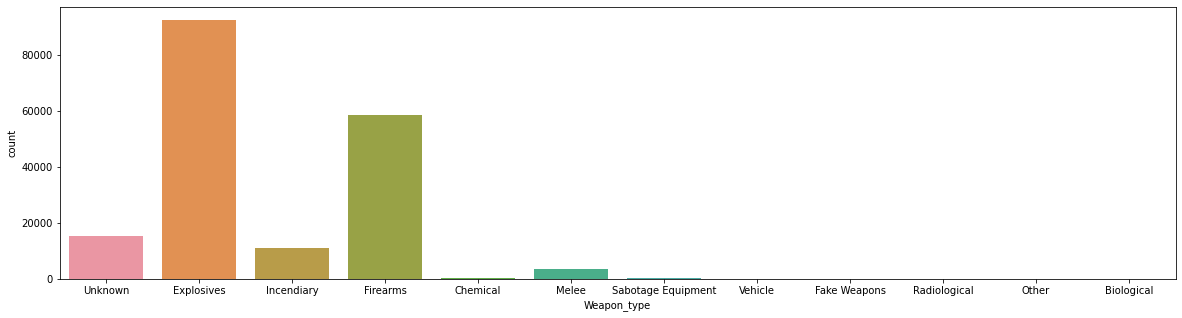

In [ ]:
plt.figure(figsize=(20,5));
sns.countplot(x=terrorism_df.Weapon_type);

Above Graphs shows Most of the attacks were attacked through explosives and then through firearms.

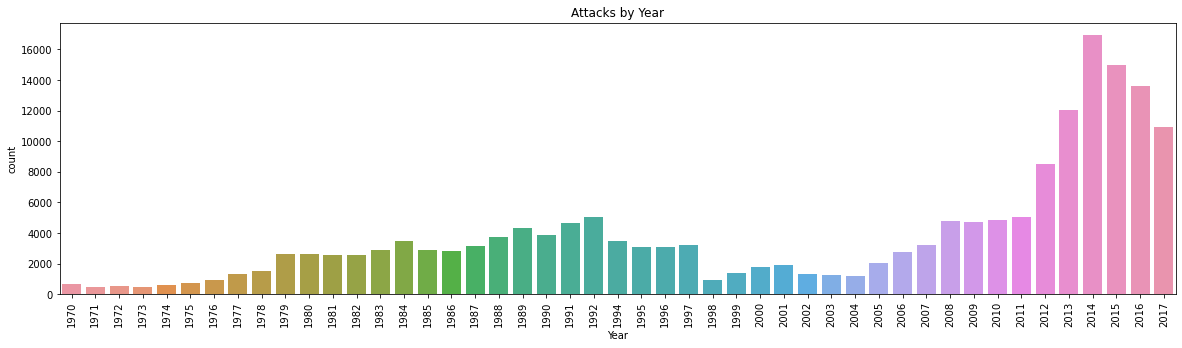

In [ ]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=terrorism_df.Year);

Above Graph shows Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.

In [ ]:
plt.figure(figsize=(20,5));

<Figure size 1440x360 with 0 Axes>

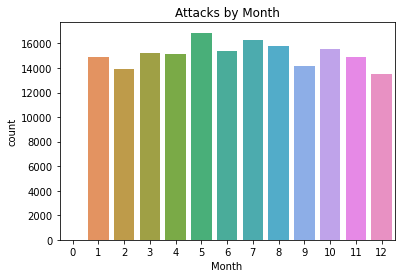

In [ ]:
plt.title('Attacks by Month')
sns.countplot(x=terrorism_df.Month);


Almost every month has the same contribution.

In [ ]:
plt.figure(figsize=(20,5));

<Figure size 1440x360 with 0 Axes>

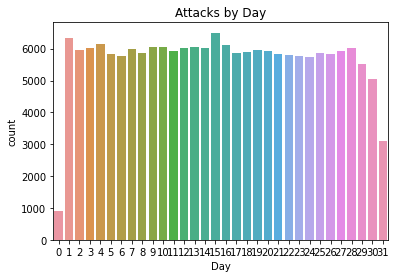

In [ ]:
plt.title('Attacks by Day')
sns.countplot(x=terrorism_df.Day);

Almost Every day has the same contribution but attacks were low during 31st and high during 15th and 1st.

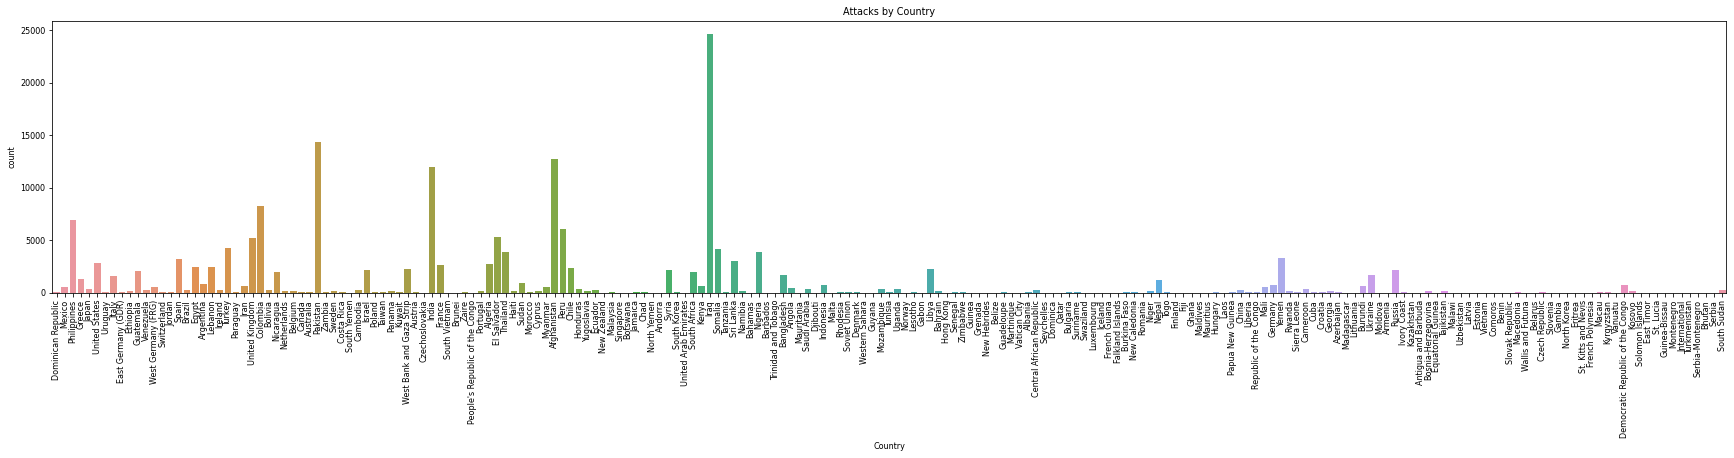

In [ ]:
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=terrorism_df.Country);

Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it. Government should increase safety measures in these countries.

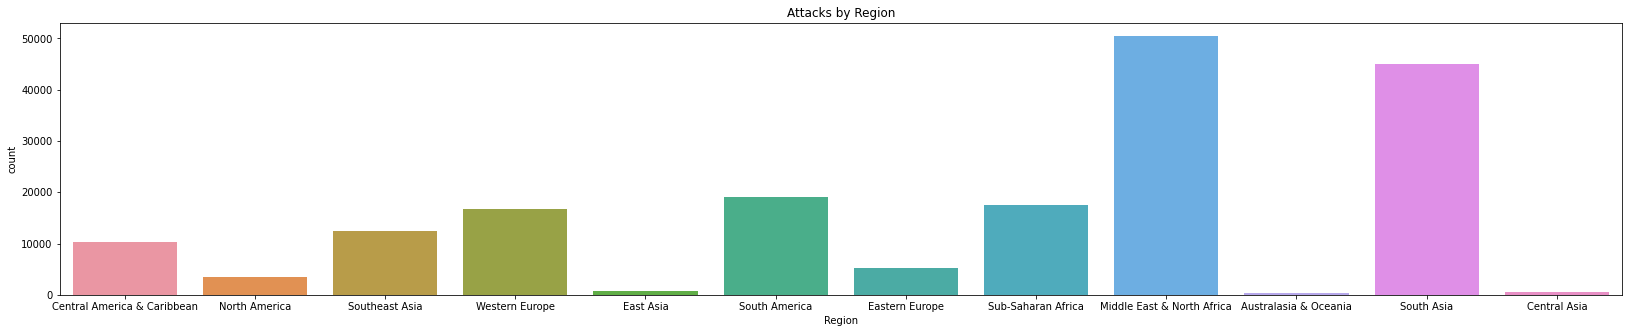

In [ ]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(x=terrorism_df.Region);

The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.

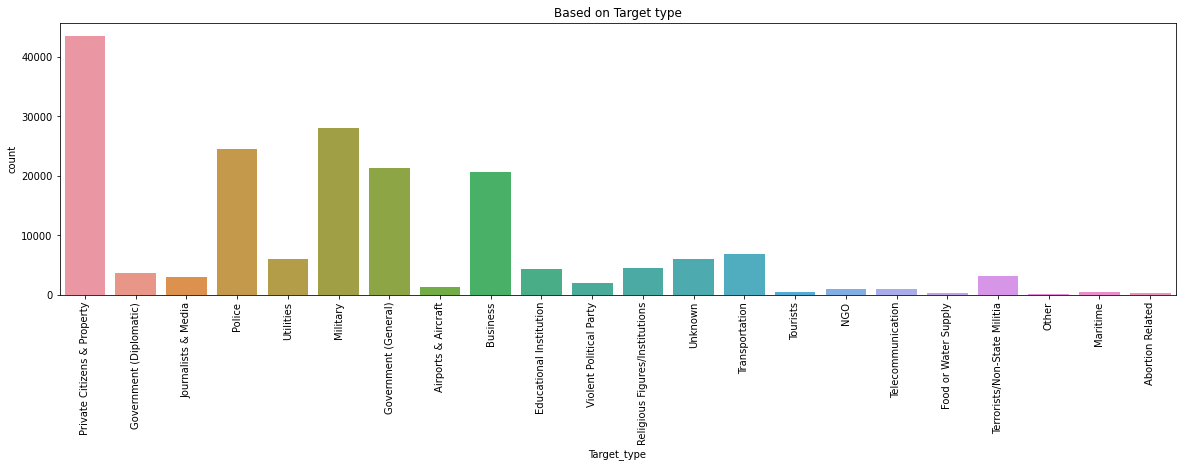

In [ ]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=terrorism_df.Target_type);

For most of the attacks, the target is Private Citizens& property and the next Military leads.

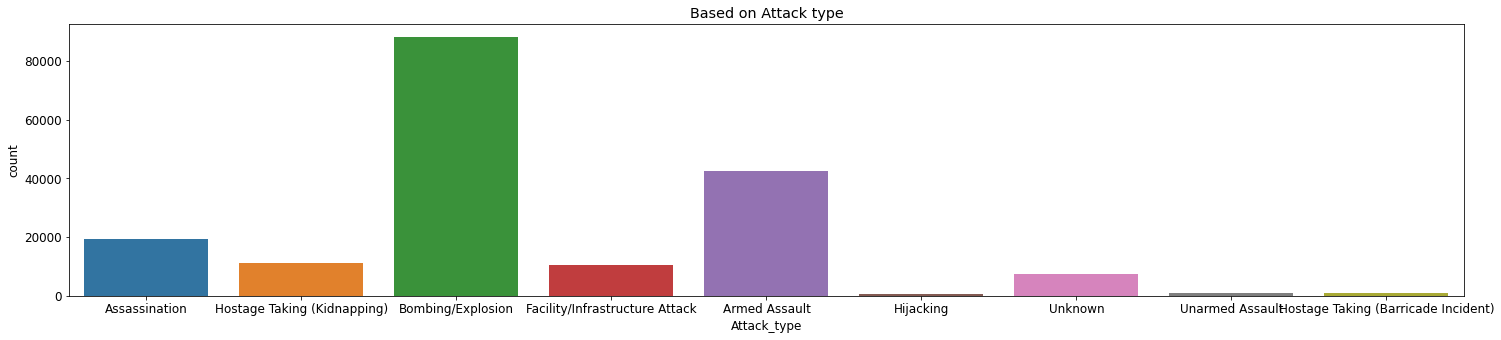

In [ ]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x=terrorism_df.Attack_type);

Most of the attacks were through either Bombing or Explosion.

### ***Results of Analysis***


1. Most of the attacks were attacked through explosives and then through firearms.

2. Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.

3. Almost Every day has the same contribution but attacks were low during 31st and high during 15th and 1st.

4. Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.

5. The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.

6. For most of the attacks, the target is Private Citizens& property and the next Military leads.

Most of the attacks were through either Bombing or Explosion.

### ***Measures to be Taken to Reduce Terrorism***

1. By reducing access to dangerous weapons

2. Government should provide more security over countries

3. Security should be strengthened across borders

4. Government should take measures on increased immigration
and many more…